In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lux
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [95]:
dataset = pd.read_csv('Derma_after_LDA3D.csv')
dataset

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [96]:
dataset.isnull().sum()
print(dataset.isnull().sum())

LDA1     0
LDA2     0
LDA3     0
class    0
dtype: int64



In [97]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

LDA1
LDA2
LDA3
class


In [98]:
X = dataset.iloc[:, 0:3].values
x = dataset.iloc[:, 0:3]
y = dataset.iloc[:, 3].values
y_name = dataset.iloc[:, 3:4]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (366, 3)
y shape: (366, 1)


In [125]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

LDA1
LDA2
LDA3


Class:
class


In [126]:
dataset.corr

<bound method DataFrame.corr of >

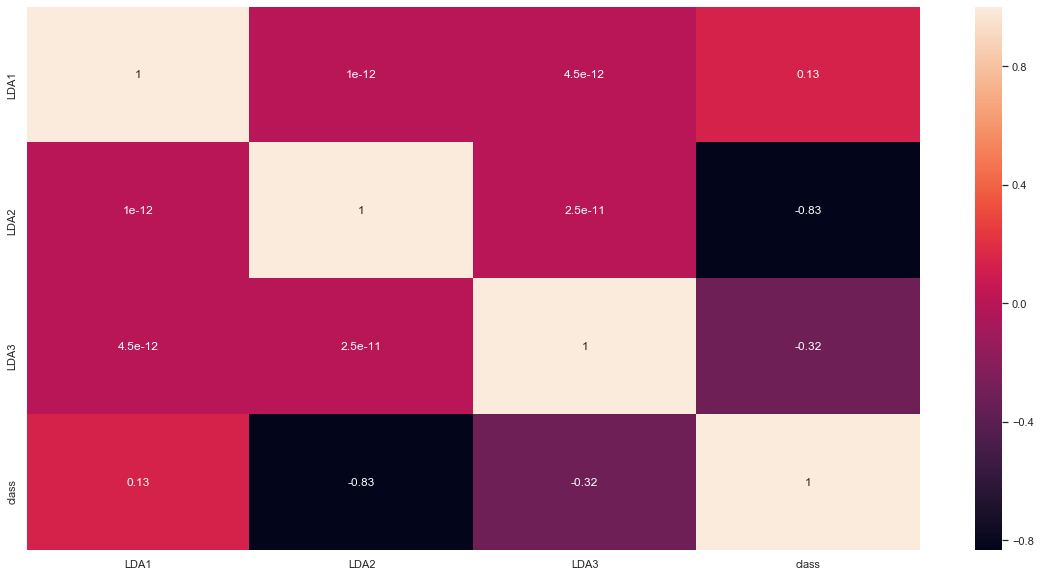

In [127]:
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [131]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [132]:
y_pred_knn = classifier_knn.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix, classification_report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)


[[38  0  0  0  0  0]
 [ 1 10  0  9  0  1]
 [ 0  0 17  0  0  0]
 [ 0  4  0  9  0  0]
 [ 0  0  0  0 17  0]
 [ 0  0  0  0  0  4]]


In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn, average='weighted')
re  = recall_score(y_test, y_pred_knn, average='weighted')
f1  = f1_score(y_test, y_pred_knn, average='weighted')
mc  = matthews_corrcoef(y_test, y_pred_knn)  

In [135]:
np.set_printoptions()
print("Akurasi =", ac)
print("Presisi =",pre)
print("Recall =", re)
print("F1 =", f1)
print("MCC =", mc)

Akurasi = 0.8636363636363636
Presisi = 0.8702331002331002
Recall = 0.8636363636363636
F1 = 0.8600948741711204
MCC = 0.8294901814553842


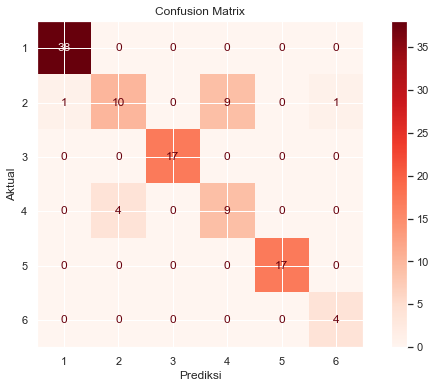

In [136]:
matrix = plot_confusion_matrix(classifier_knn, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.gcf().axes[0].tick_params
plt.gcf().axes[1].tick_params
plt.gcf().set_size_inches(10,6)
plt.show()

In [137]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

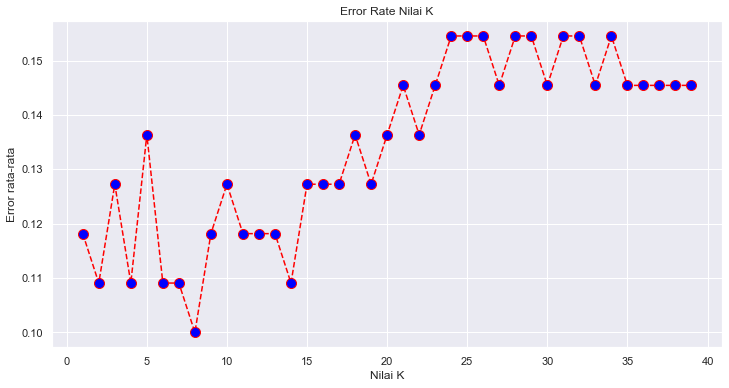

In [138]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')